In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\karal\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global the millennia,sector 37d,0.60,9231.0,2,2,3,7.0,New Property,625.0,0,0,0,0,0,1,35
1,flat,shree vardhman victoria,sector 70,1.80,9231.0,3,5,3,0.0,New Property,2167.0,0,0,0,0,0,1,72
2,flat,signature global park,sohna road,0.87,7190.0,3,2,3,4.0,Relatively New,1210.0,0,0,0,0,0,1,58
3,flat,conscient heritage max,sector 102,2.00,9307.0,3,4,3+,13.0,Relatively New,1900.0,1,1,0,0,0,2,174
4,flat,emaar mgf emerald floors premier,sector 65,2.35,16207.0,3,3,3,2.0,Relatively New,1500.0,1,1,0,0,0,2,64


In [7]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [8]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 37d,0.60,2,2,3,7.0,New Property,625.0,0,0,0,0,0,1,35
1,flat,sector 70,1.80,3,5,3,0.0,New Property,2167.0,0,0,0,0,0,1,72
2,flat,sohna road,0.87,3,2,3,4.0,Relatively New,1210.0,0,0,0,0,0,1,58
3,flat,sector 102,2.00,3,4,3+,13.0,Relatively New,1900.0,1,1,0,0,0,2,174
4,flat,sector 65,2.35,3,3,3,2.0,Relatively New,1500.0,1,1,0,0,0,2,64


### luxury score

<Axes: >

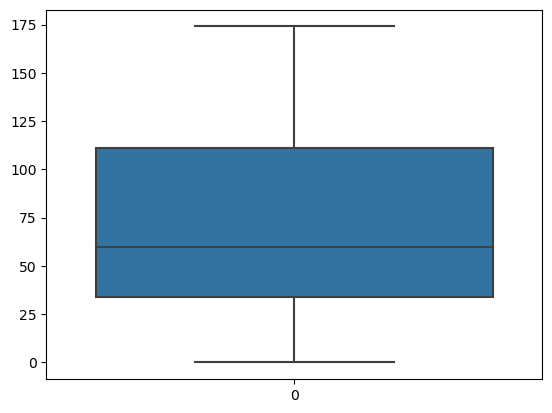

In [9]:
sns.boxplot(df['luxury_score'])

In [10]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [11]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 37d,0.60,2,2,3,7.0,New Property,625.0,0,0,0,0,0,1,35,Low
1,flat,sector 70,1.80,3,5,3,0.0,New Property,2167.0,0,0,0,0,0,1,72,Medium
2,flat,sohna road,0.87,3,2,3,4.0,Relatively New,1210.0,0,0,0,0,0,1,58,Medium
3,flat,sector 102,2.00,3,4,3+,13.0,Relatively New,1900.0,1,1,0,0,0,2,174,High
4,flat,sector 65,2.35,3,3,3,2.0,Relatively New,1500.0,1,1,0,0,0,2,64,Medium


### floorNum

<Axes: >

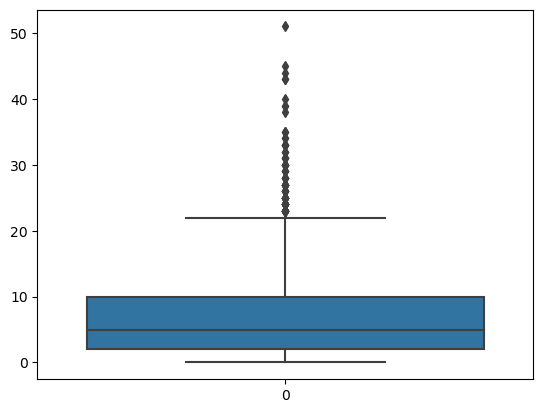

In [13]:
sns.boxplot(df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [15]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 37d,0.60,2,2,3,7.0,New Property,625.0,0,0,0,0,0,1,35,Low,Mid Floor
1,flat,sector 70,1.80,3,5,3,0.0,New Property,2167.0,0,0,0,0,0,1,72,Medium,Low Floor
2,flat,sohna road,0.87,3,2,3,4.0,Relatively New,1210.0,0,0,0,0,0,1,58,Medium,Mid Floor
3,flat,sector 102,2.00,3,4,3+,13.0,Relatively New,1900.0,1,1,0,0,0,2,174,High,High Floor
4,flat,sector 65,2.35,3,3,3,2.0,Relatively New,1500.0,1,1,0,0,0,2,64,Medium,Low Floor


In [17]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 37d,0.60,2,2,3,New Property,625.0,0,0,0,0,0,1,Low,Mid Floor
1,flat,sector 70,1.80,3,5,3,New Property,2167.0,0,0,0,0,0,1,Medium,Low Floor
2,flat,sohna road,0.87,3,2,3,Relatively New,1210.0,0,0,0,0,0,1,Medium,Mid Floor
3,flat,sector 102,2.00,3,4,3+,Relatively New,1900.0,1,1,0,0,0,2,High,High Floor
4,flat,sector 65,2.35,3,3,3,Relatively New,1500.0,1,1,0,0,0,2,Medium,Low Floor


In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [20]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,46.0,2,2,3.0,1.0,625.0,0,0,0,0,0,1,1.0,2.0
1,0.0,82.0,3,5,3.0,1.0,2167.0,0,0,0,0,0,1,2.0,1.0
2,0.0,113.0,3,2,3.0,3.0,1210.0,0,0,0,0,0,1,2.0,2.0
3,0.0,6.0,3,4,4.0,3.0,1900.0,1,1,0,0,0,2,0.0,0.0
4,0.0,75.0,3,3,3.0,3.0,1500.0,1,1,0,0,0,2,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,60.0,3,4,3.0,0.0,1773.0,0,0,1,1,0,1,2.0,1.0
3550,1.0,59.0,5,7,4.0,0.0,3240.0,1,1,0,1,1,2,0.0,2.0
3551,0.0,6.0,2,2,1.0,3.0,582.0,0,0,1,0,0,1,0.0,2.0
3552,0.0,12.0,2,2,2.0,3.0,1505.0,0,0,0,0,0,1,1.0,0.0


In [21]:
y_label

0        0.60
1        1.80
2        0.87
3        2.00
4        2.35
        ...  
3549     1.70
3550    10.45
3551     0.48
3552     0.70
3553     1.02
Name: price, Length: 3554, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

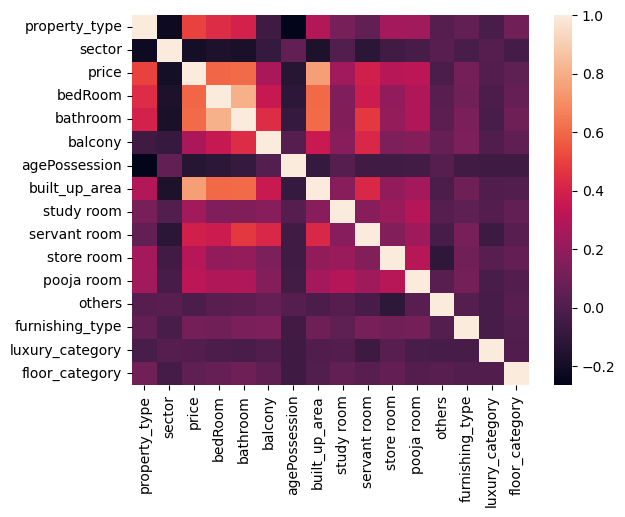

In [22]:
sns.heatmap(data_label_encoded.corr())

In [33]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.198422
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.133528
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.647478
0,property_type,0.104645
1,sector,0.103682
2,bedRoom,0.024387
8,servant room,0.023161
3,bathroom,0.023059
5,agePossession,0.014752
4,balcony,0.012025
12,furnishing_type,0.009030
9,store room,0.008196


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.683546
1,sector,0.103610
0,property_type,0.097350
2,bedRoom,0.034624
3,bathroom,0.033889
8,servant room,0.024432
9,store room,0.008973
5,agePossession,0.004918
7,study room,0.003774
12,furnishing_type,0.002198


### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.663653
0,property_type,0.243948
1,sector,0.150978
2,bedRoom,0.038558
8,servant room,0.019022
3,bathroom,0.013191
5,agePossession,0.004745
4,balcony,0.003513
10,pooja room,0.001363
12,furnishing_type,0.000877


### Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.509275
0,property_type,0.711701
3,bathroom,0.290108
9,store room,0.206985
8,servant room,0.182015
7,study room,0.179161
10,pooja room,0.085374
13,luxury_category,0.043418
12,furnishing_type,0.043106
2,bedRoom,0.020231


### Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.647446
0,property_type,0.108173
1,sector,0.105936
3,bathroom,0.021717
8,servant room,0.021269
2,bedRoom,0.020973
5,agePossession,0.014020
4,balcony,0.013245
12,furnishing_type,0.009836
7,study room,0.009187


### Technique 7 - Linear Regression Weights

In [28]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.511678
0,property_type,0.709703
3,bathroom,0.297565
9,store room,0.211511
8,servant room,0.191674
7,study room,0.188029
10,pooja room,0.088735
13,luxury_category,0.053991
12,furnishing_type,0.052562
2,bedRoom,0.023357


### Technique 8 - SHAP

In [29]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
    --------------------------------------- 10.2/456.1 kB ? eta -:--:--
   ----- --------------------------------- 61.4/456.1 kB 825.8 kB/s eta 0:00:01
   -------------------------- ------------- 307.2/456.1 kB 2.7 MB/s eta 0:00:01
   --------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [30]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.20200419,  0.06626961, -0.05018157, ..., -0.01008973,
        -0.00416556, -0.01107589],
       [-0.39100841, -0.13294782, -0.0216418 , ..., -0.03853464,
        -0.01543605, -0.03928592],
       [-0.19483738, -0.43550351, -0.01749702, ..., -0.01119739,
         0.00185497, -0.01006399],
       ...,
       [-0.1935553 , -0.07325897, -0.04954752, ..., -0.0088911 ,
         0.03182797, -0.00793112],
       [-0.2271155 , -0.20427241, -0.10616623, ..., -0.01639294,
        -0.00742111,  0.06323222],
       [-0.23092592, -0.56775398, -0.04799047, ..., -0.01011239,
         0.01329801, -0.01126392]])

In [31]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.249007
0,property_type,0.483238
1,sector,0.380898
3,bathroom,0.108754
8,servant room,0.105241
2,bedRoom,0.054428
4,balcony,0.040274
5,agePossession,0.027919
12,furnishing_type,0.025342
14,floor_category,0.025123


In [34]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [35]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.198422,0.103682,0.103610,0.150978,-0.044276,0.105936,-0.052966,0.380898
bedRoom,0.591289,0.024387,0.034624,0.038558,0.020231,0.020973,0.023357,0.054428
bathroom,0.609777,0.023059,0.033889,0.013191,0.290108,0.021717,0.297565,0.108754
balcony,0.269637,0.012025,0.001700,0.003513,-0.035229,0.013245,-0.058226,0.040274
agePossession,-0.133528,0.014752,0.004918,0.004745,-0.000000,0.014020,-0.004069,0.027919
built_up_area,0.748574,0.647478,0.683546,0.663653,1.509275,0.647446,1.511678,1.249007
study room,0.242955,0.007664,0.003774,-0.000678,0.179161,0.009187,0.188029,0.017752
servant room,0.391930,0.023161,0.024432,0.019022,0.182015,0.021269,0.191674,0.105241
store room,0.305677,0.008196,0.008973,-0.000141,0.206985,0.007735,0.211511,0.015789


In [47]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(), axis=1)

In [51]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.060084,0.115800,0.114784,0.168647,-0.017949,0.118786,-0.021427,0.182849
bedRoom,0.179048,0.027237,0.038358,0.043070,0.008202,0.023517,0.009449,0.026128
bathroom,0.184646,0.025754,0.037544,0.014735,0.117609,0.024351,0.120381,0.052207
balcony,0.081649,0.013430,0.001883,0.003924,-0.014282,0.014851,-0.023556,0.019333
agePossession,-0.040434,0.016477,0.005448,0.005300,-0.000000,0.015720,-0.001646,0.013402
built_up_area,0.226675,0.723152,0.757266,0.741321,0.611858,0.725977,0.611554,0.599583
study room,0.073569,0.008560,0.004181,-0.000758,0.072632,0.010301,0.076068,0.008522
servant room,0.118680,0.025868,0.027067,0.021248,0.073789,0.023849,0.077542,0.050521
store room,0.092562,0.009154,0.009941,-0.000157,0.083912,0.008673,0.085567,0.007579


In [45]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.709460
sector             0.140173
bedRoom            0.031662
bathroom           0.030918
servant room       0.029711
agePossession      0.011269
balcony            0.010684
furnishing_type    0.007339
store room         0.007038
study room         0.006161
floor_category     0.005181
luxury_category    0.004625
pooja room         0.003653
others             0.002126
dtype: float64

In [49]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,46.0,2,2,3.0,1.0,625.0,0,0,0,0,0,1,1.0,2.0
1,0.0,82.0,3,5,3.0,1.0,2167.0,0,0,0,0,0,1,2.0,1.0
2,0.0,113.0,3,2,3.0,3.0,1210.0,0,0,0,0,0,1,2.0,2.0
3,0.0,6.0,3,4,4.0,3.0,1900.0,1,1,0,0,0,2,0.0,0.0
4,0.0,75.0,3,3,3.0,3.0,1500.0,1,1,0,0,0,2,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,60.0,3,4,3.0,0.0,1773.0,0,0,1,1,0,1,2.0,1.0
3550,1.0,59.0,5,7,4.0,0.0,3240.0,1,1,0,1,1,2,0.0,2.0
3551,0.0,6.0,2,2,1.0,3.0,582.0,0,0,1,0,0,1,0.0,2.0
3552,0.0,12.0,2,2,2.0,3.0,1505.0,0,0,0,0,0,1,1.0,0.0


In [50]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [55]:
scores.mean()

0.8168839374608193

In [56]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [57]:
scores.mean()

0.8152998857290138

In [58]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [59]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [60]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,46.0,2,2,3.0,1.0,625.0,0,0,1,1.0,2.0,0.60
1,0.0,82.0,3,5,3.0,1.0,2167.0,0,0,1,2.0,1.0,1.80
2,0.0,113.0,3,2,3.0,3.0,1210.0,0,0,1,2.0,2.0,0.87
3,0.0,6.0,3,4,4.0,3.0,1900.0,1,0,2,0.0,0.0,2.00
4,0.0,75.0,3,3,3.0,3.0,1500.0,1,0,2,2.0,1.0,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,60.0,3,4,3.0,0.0,1773.0,0,1,1,2.0,1.0,1.70
3550,1.0,59.0,5,7,4.0,0.0,3240.0,1,0,2,0.0,2.0,10.45
3551,0.0,6.0,2,2,1.0,3.0,582.0,0,1,1,0.0,2.0,0.48
3552,0.0,12.0,2,2,2.0,3.0,1505.0,0,0,1,1.0,0.0,0.70
